# Heart Disease Prediction

In this machine learning project, I will be using Machine Learning to predict whether any person is suffering from heart disease.  I will apply different classification algorithms, such as KNN, Decision Trees, Logistic Regression and SVM to make the predictions.


I have performed Exploratory Data Analysis on the Heart Diseases UCI and tried to identify relationship between heart disease and various other features.

# Table of contents

1. [Data Description](#1)
2. [Data Analysis](#2)
3. [Data Visualization](#3)
4. [Data Pre-processing](#4)
5. [k-Nearest Neighbor](#5)
6. [Logistic Regression](#6)
7. [Random Forest](#7)
8. [Conclusion](#8)

**Dataset by Heart Disease UCI:**

Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Dataset columns:**

* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
— Value 0: asymptomatic
— Value 1: atypical angina
— Value 2: non-anginal pain
— Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* hol: The person’s cholesterol measurement in mg/dl
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: resting electrocardiographic results
— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
— Value 1: normal
— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
0: downsloping; 1: flat; 2: upsloping
* ca: The number of major vessels (0–3)
* thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
* target: Heart disease (1 = no, 0= yes)

**Context:**

This is multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has a heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#url = "/content/drive/My Drive/Colab Notebooks/Kaggle/Heart Disease UCI/heart.csv"
url = "https://raw.githubusercontent.com/anhle/Kaggle/master/Heart_Disease_UCI/heart.csv"
df = pd.read_csv(url)
df.info()

# 1. Data Description <a name="1"></a>

In [ ]:
#description
df.describe()

In [ ]:
#check for null
df.isnull().sum()

In [ ]:
#visualizing Null values if it exists 
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [ ]:
# To uninstall old version of colab
!pip uninstall pandas_profiling
!pip install pandas-profiling

In [4]:
import pandas_profiling as pp
pp.ProfileReport(df)

# Data Analysis <a name="2"></a>

**Feature Selection**

1. Univariate Selection — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.

The following example uses the chi-squared (chi2) statistical test for non-negative features to select 13 of the best features from the Dataset.

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


2. Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.

Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top features for the dataset.

[0.07184173 0.05277019 0.12997344 0.06197063 0.05808545 0.02075638
 0.03461566 0.08685216 0.10744042 0.08855509 0.06044893 0.12213294
 0.10455696]


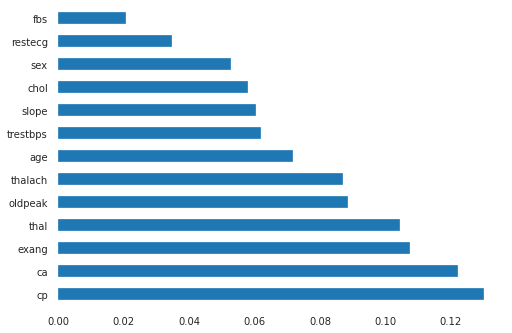

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')


3. Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

Correlation shows whether the characteristics are related to each other or to the target variable. Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased). 

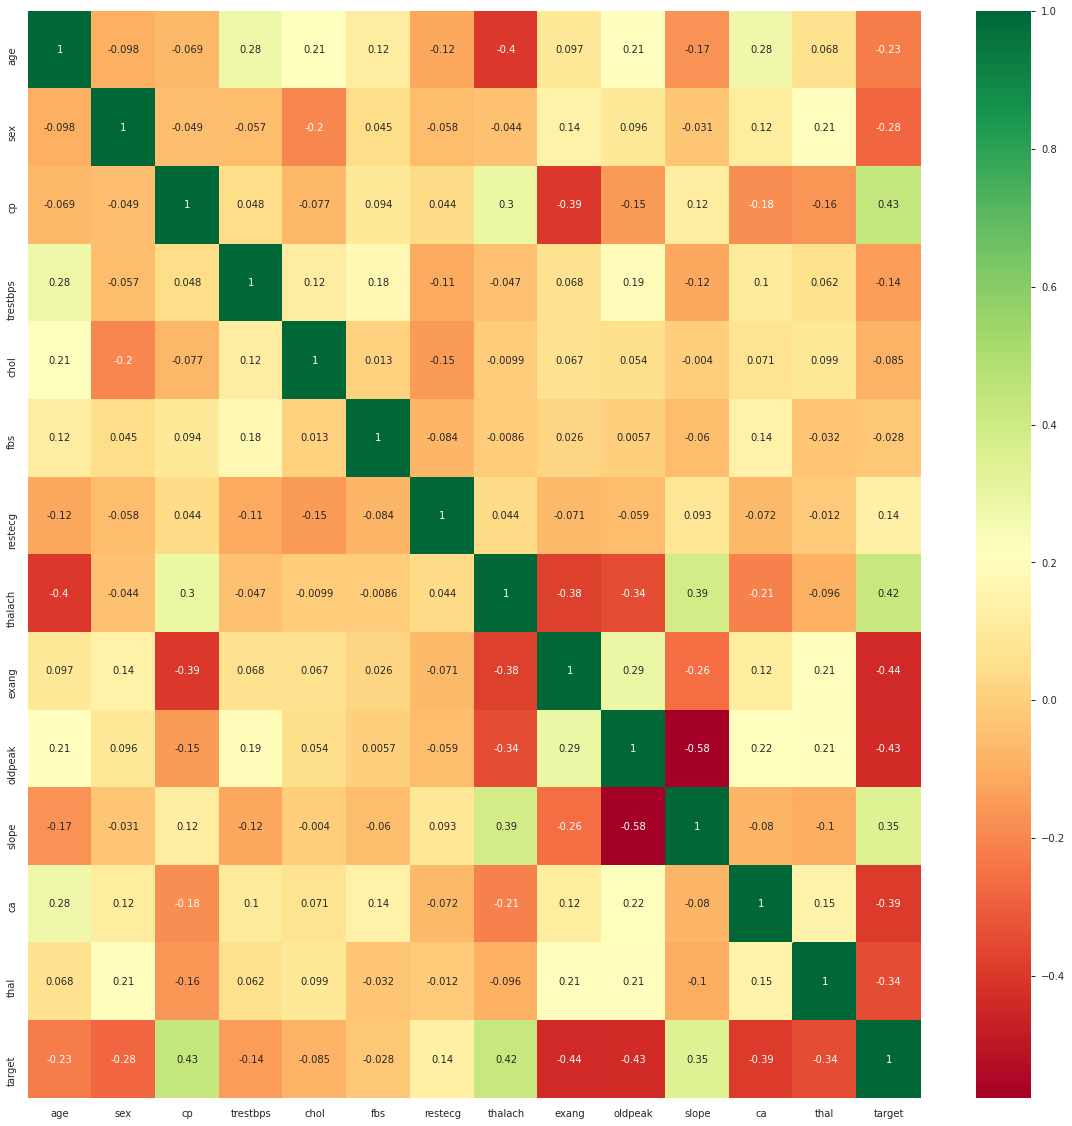

In [5]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. Medical emergency is a heart attack. A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain.

# Data Visualization <a name="3"></a>

## 1. Countplot

Number of people who have heart disease according to age 

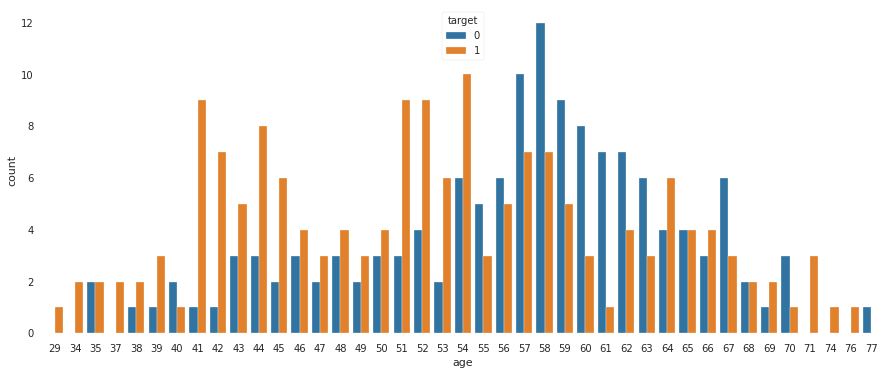

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data=df,hue='target')


Text(0.5, 1.0, 'Gender v/s target\n')

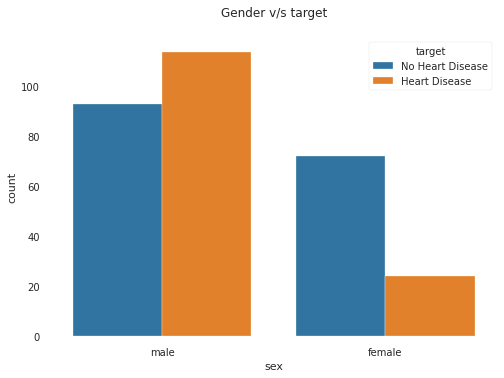

In [15]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
      return 'female'
    else:
      return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
      return 'Heart Disease'
    else:
      return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)
df['target'] = df['target'].apply(chng2)

sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

According to this Cleveland dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women. Sudden Heart Attacks are experienced by men between 70% — 89%. Woman may experience a heart attack with no chest pressure at all, they usually experience nausea or vomiting which are often confused with acid reflux or the flu.

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

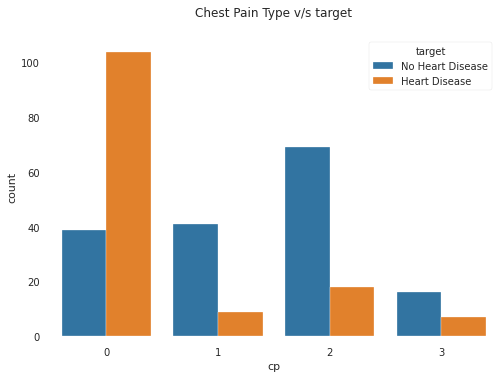

In [16]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. Most of the Heart Disease patients are found to have asymptomatic chest pain. These group of people might show atypical symptoms like indigestion, flu or a strained chest muscle. A asymptomatic attack, like any heart attack, involves, blockage of blood flow to your heart and possible damage to the heart muscle. The risk factors for asymptomatic heart attacks are same as those with heart symptoms. These factors include:
· Age
· Diabetes
· Excess weight
· Family History of Heart Disease
· High Blood Pressure
· High cholesterol
· Lack of exercise
· Prior Heart attack
· Tobacco use




Asymptomatic Heart attack puts you at a greater risk of having another heart attack which could be d deadly. Having another heart attack also increases your risk of complications, such as heart failure. There are no test to determine your potential for asymptomatic heart attack. The only way to tell If you had asymptomatic attack is by an electrocardiogram or echocardiogram. These tests can reveal changes that signal a heart attack.

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


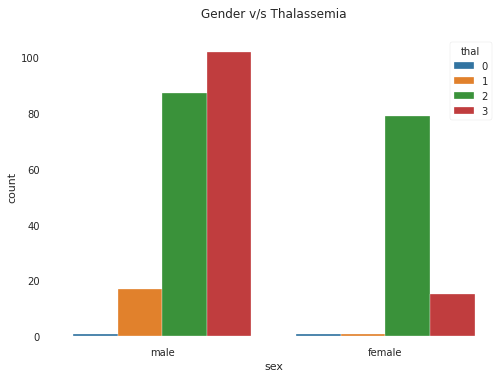

In [17]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')

The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types , dilated type, with left ventricular dilatation and impaired contractility and a restrictive pheno type, with restrictive left ventricular feeling , pulmonary hyper tension and right heart failure. Heart problems, congestive heart failures and abnormal heart rhythms can be associated with severe thalassemia.

Text(0.5, 1.0, 'Slope v/s Target\n')

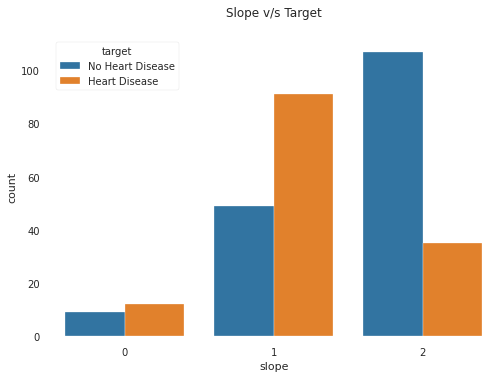

In [18]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

## 2. Distplot

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

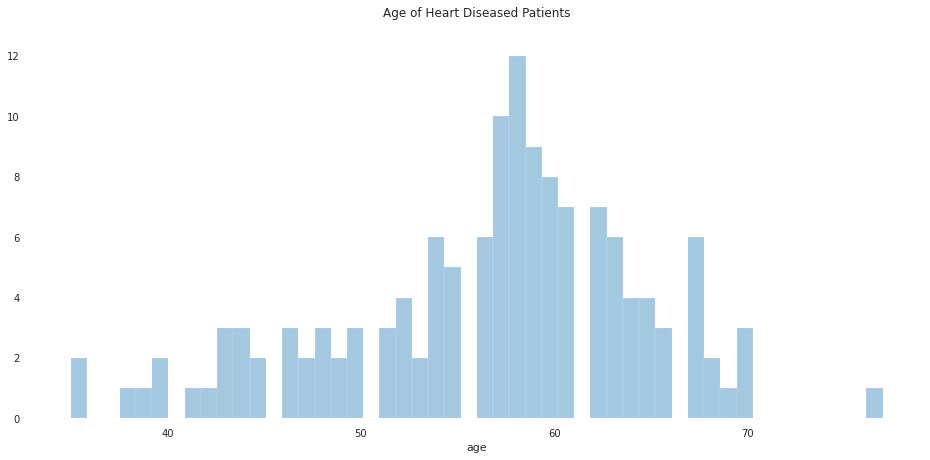

In [8]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60. But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

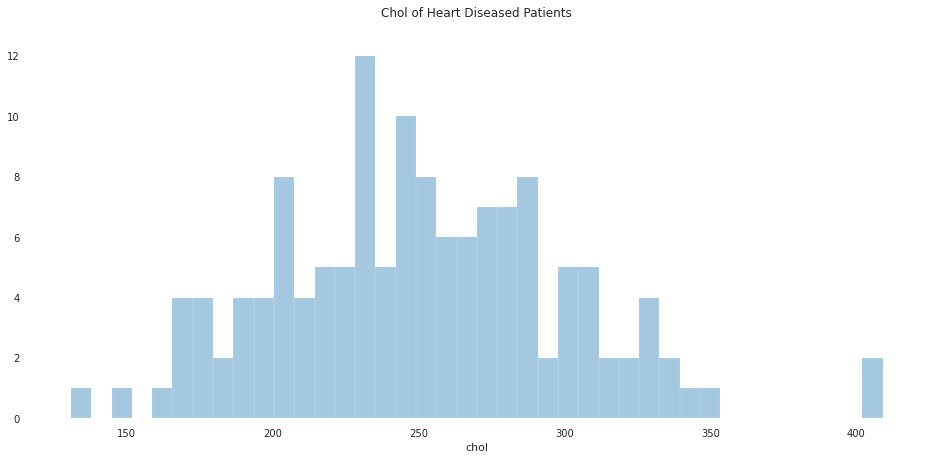

In [21]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

## Jointplot

Joint plots in seaborn helps us to understand the trend seen among two features

Age vs trestbps(Heart Diseased Patinets)


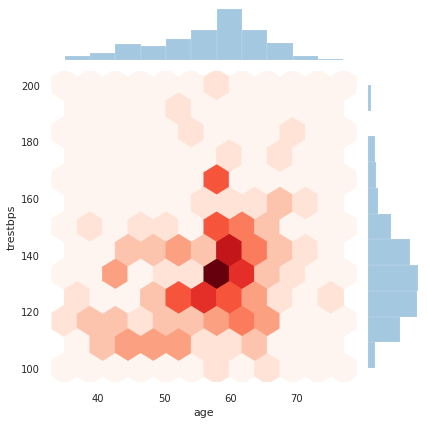

In [22]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] 
#target 0 - people with heart disease
pal = sns.light_palette("blue", as_cmap=True)
print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )

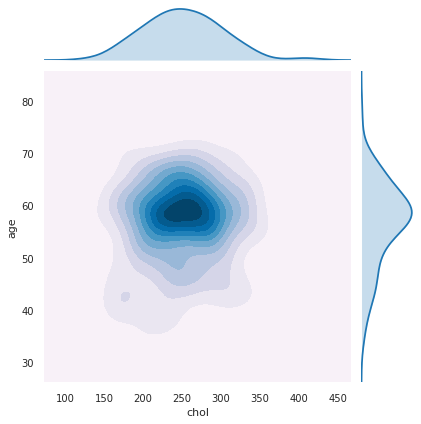

In [23]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

As observed from the above plot we can see that most of the Heart diseased patients in their age of upper 50s or lower 60s tend to have Cholesterol between 200mg/dl to 300mg/dl.

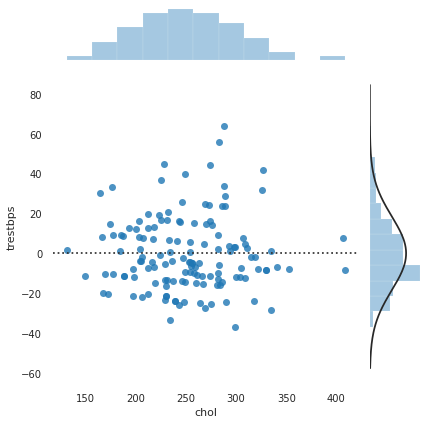

In [24]:
sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )

## 4. Boxplot

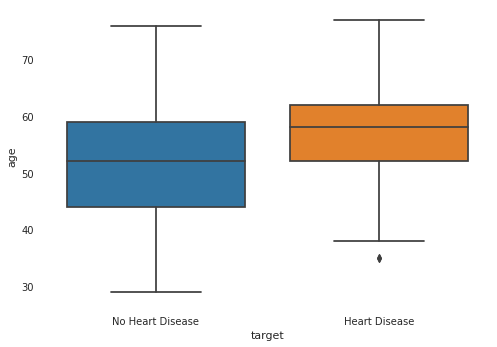

In [25]:
sns.boxplot(data=df2,x='target',y='age')

5.Pairplot

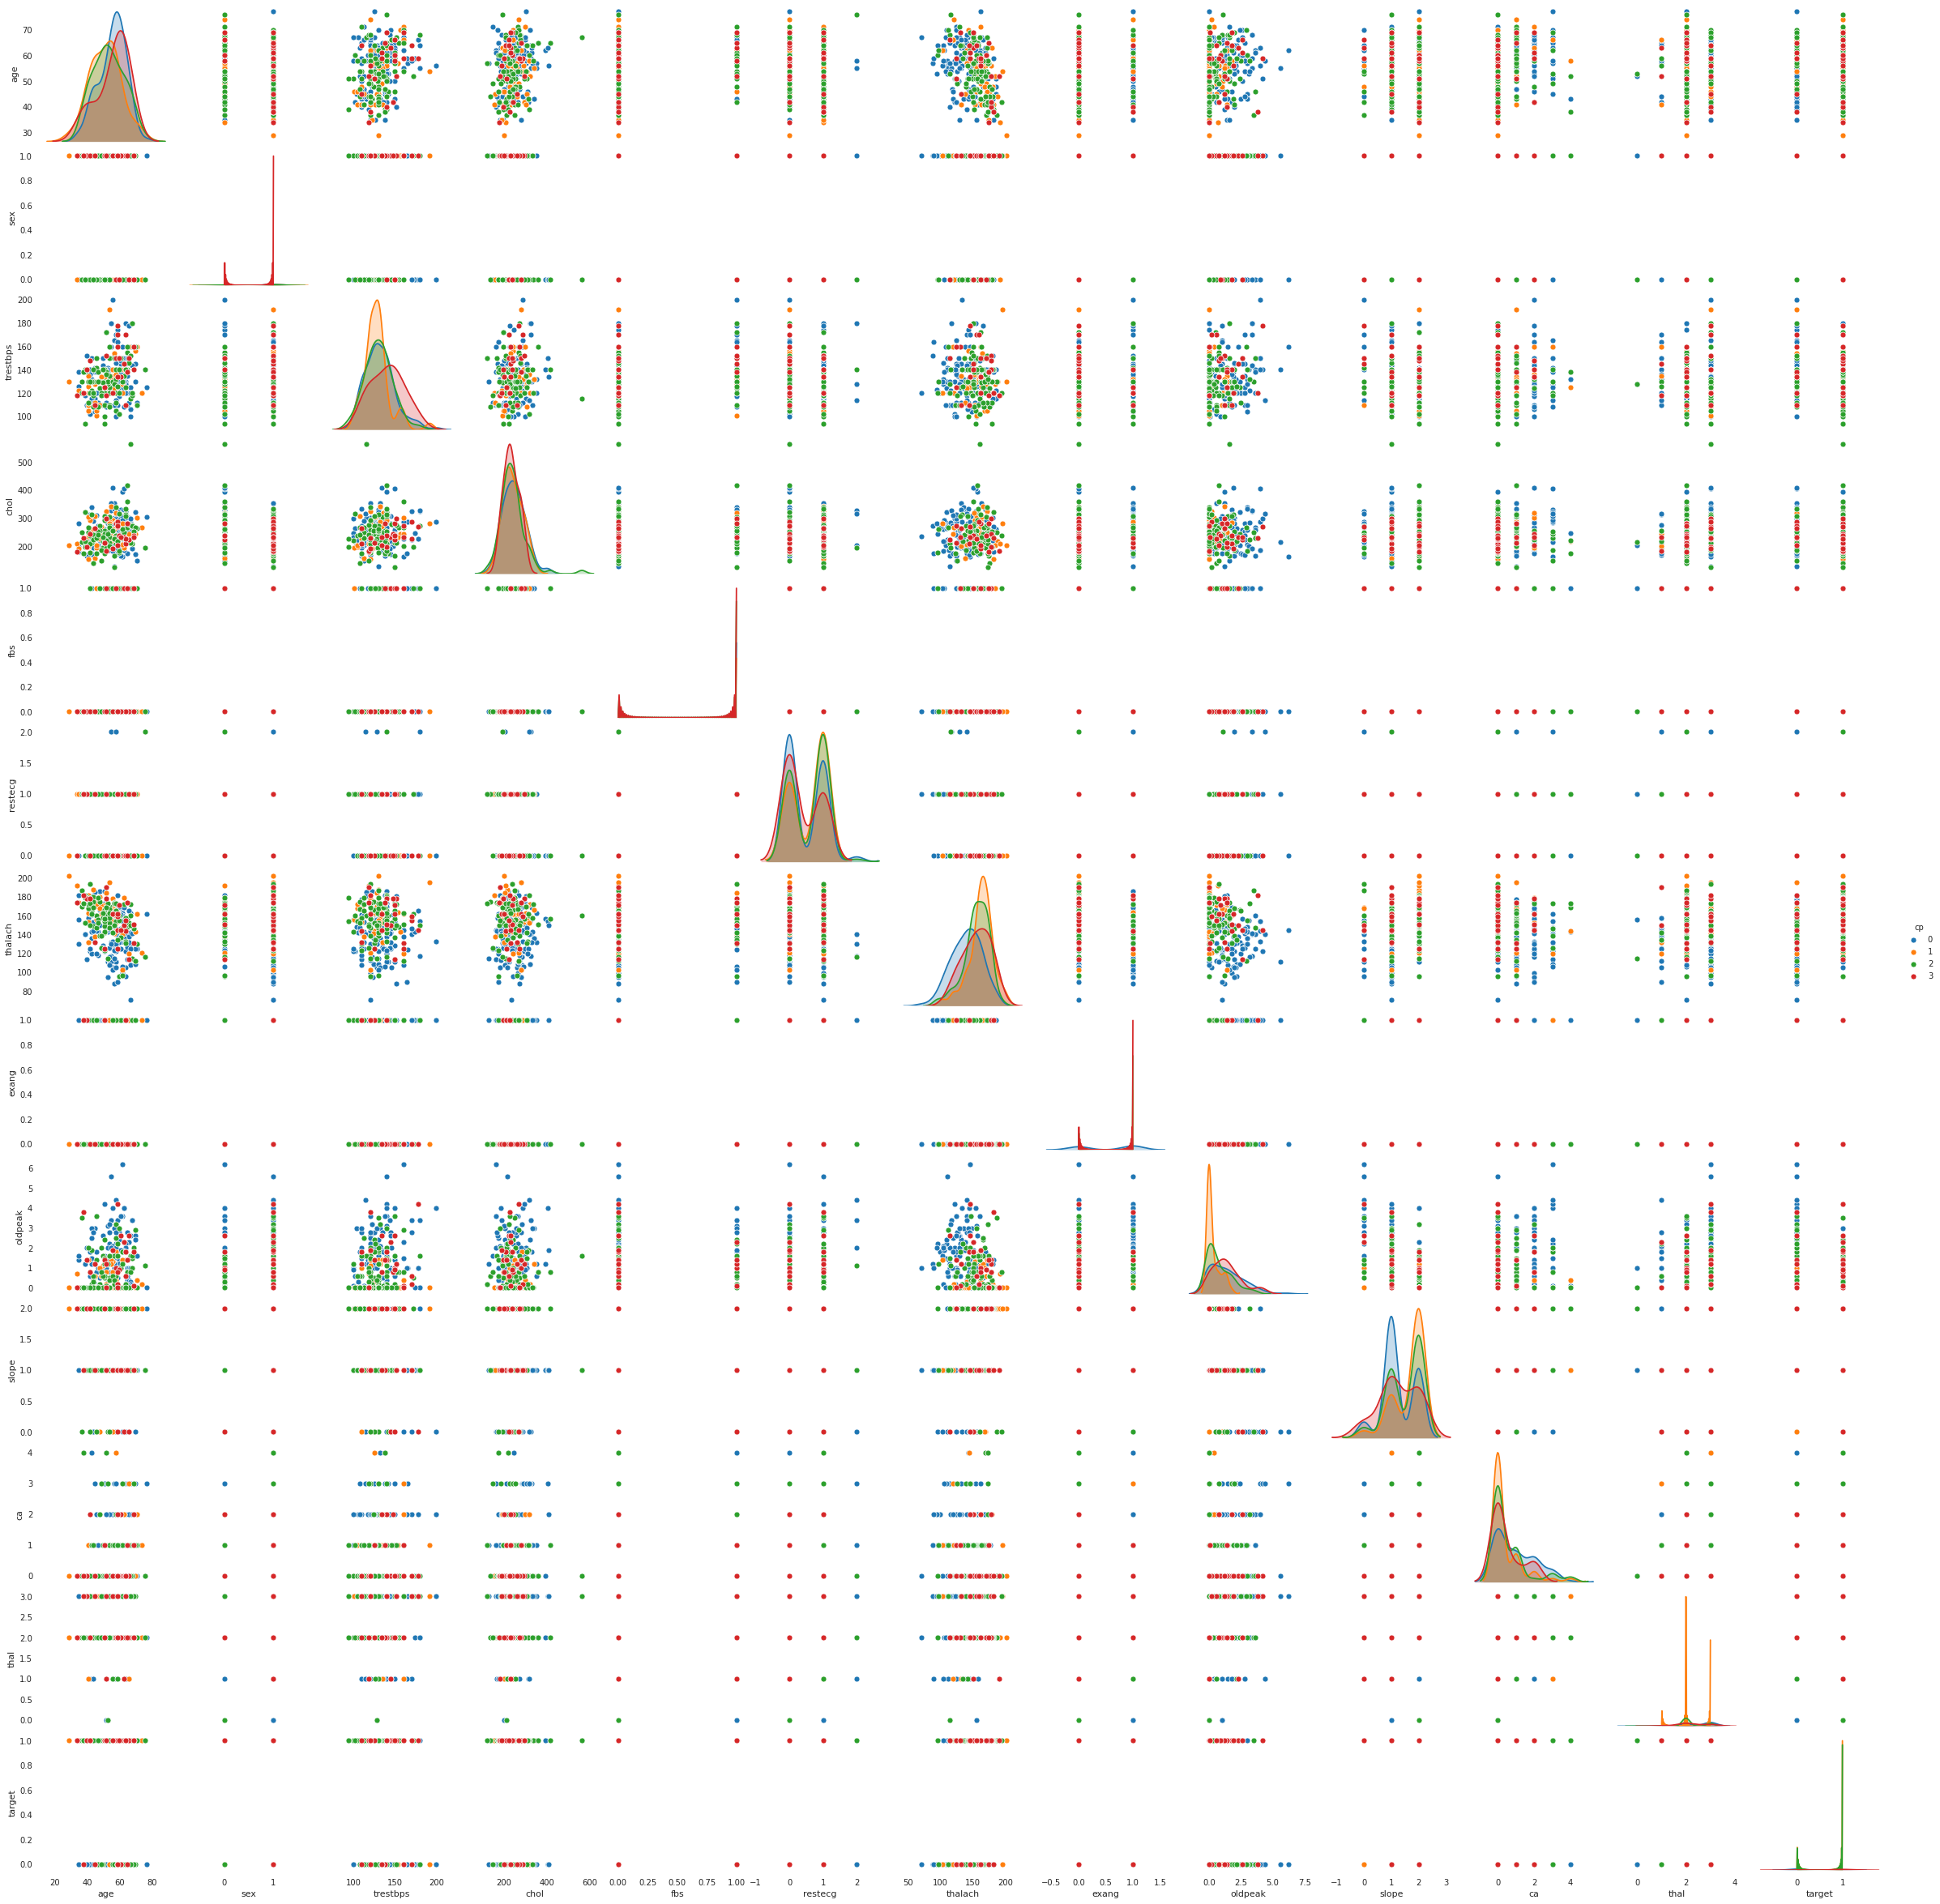

In [6]:
sns.pairplot(df,hue='cp')

In [7]:
df_org = df.copy()

# Classification Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7032967032967034


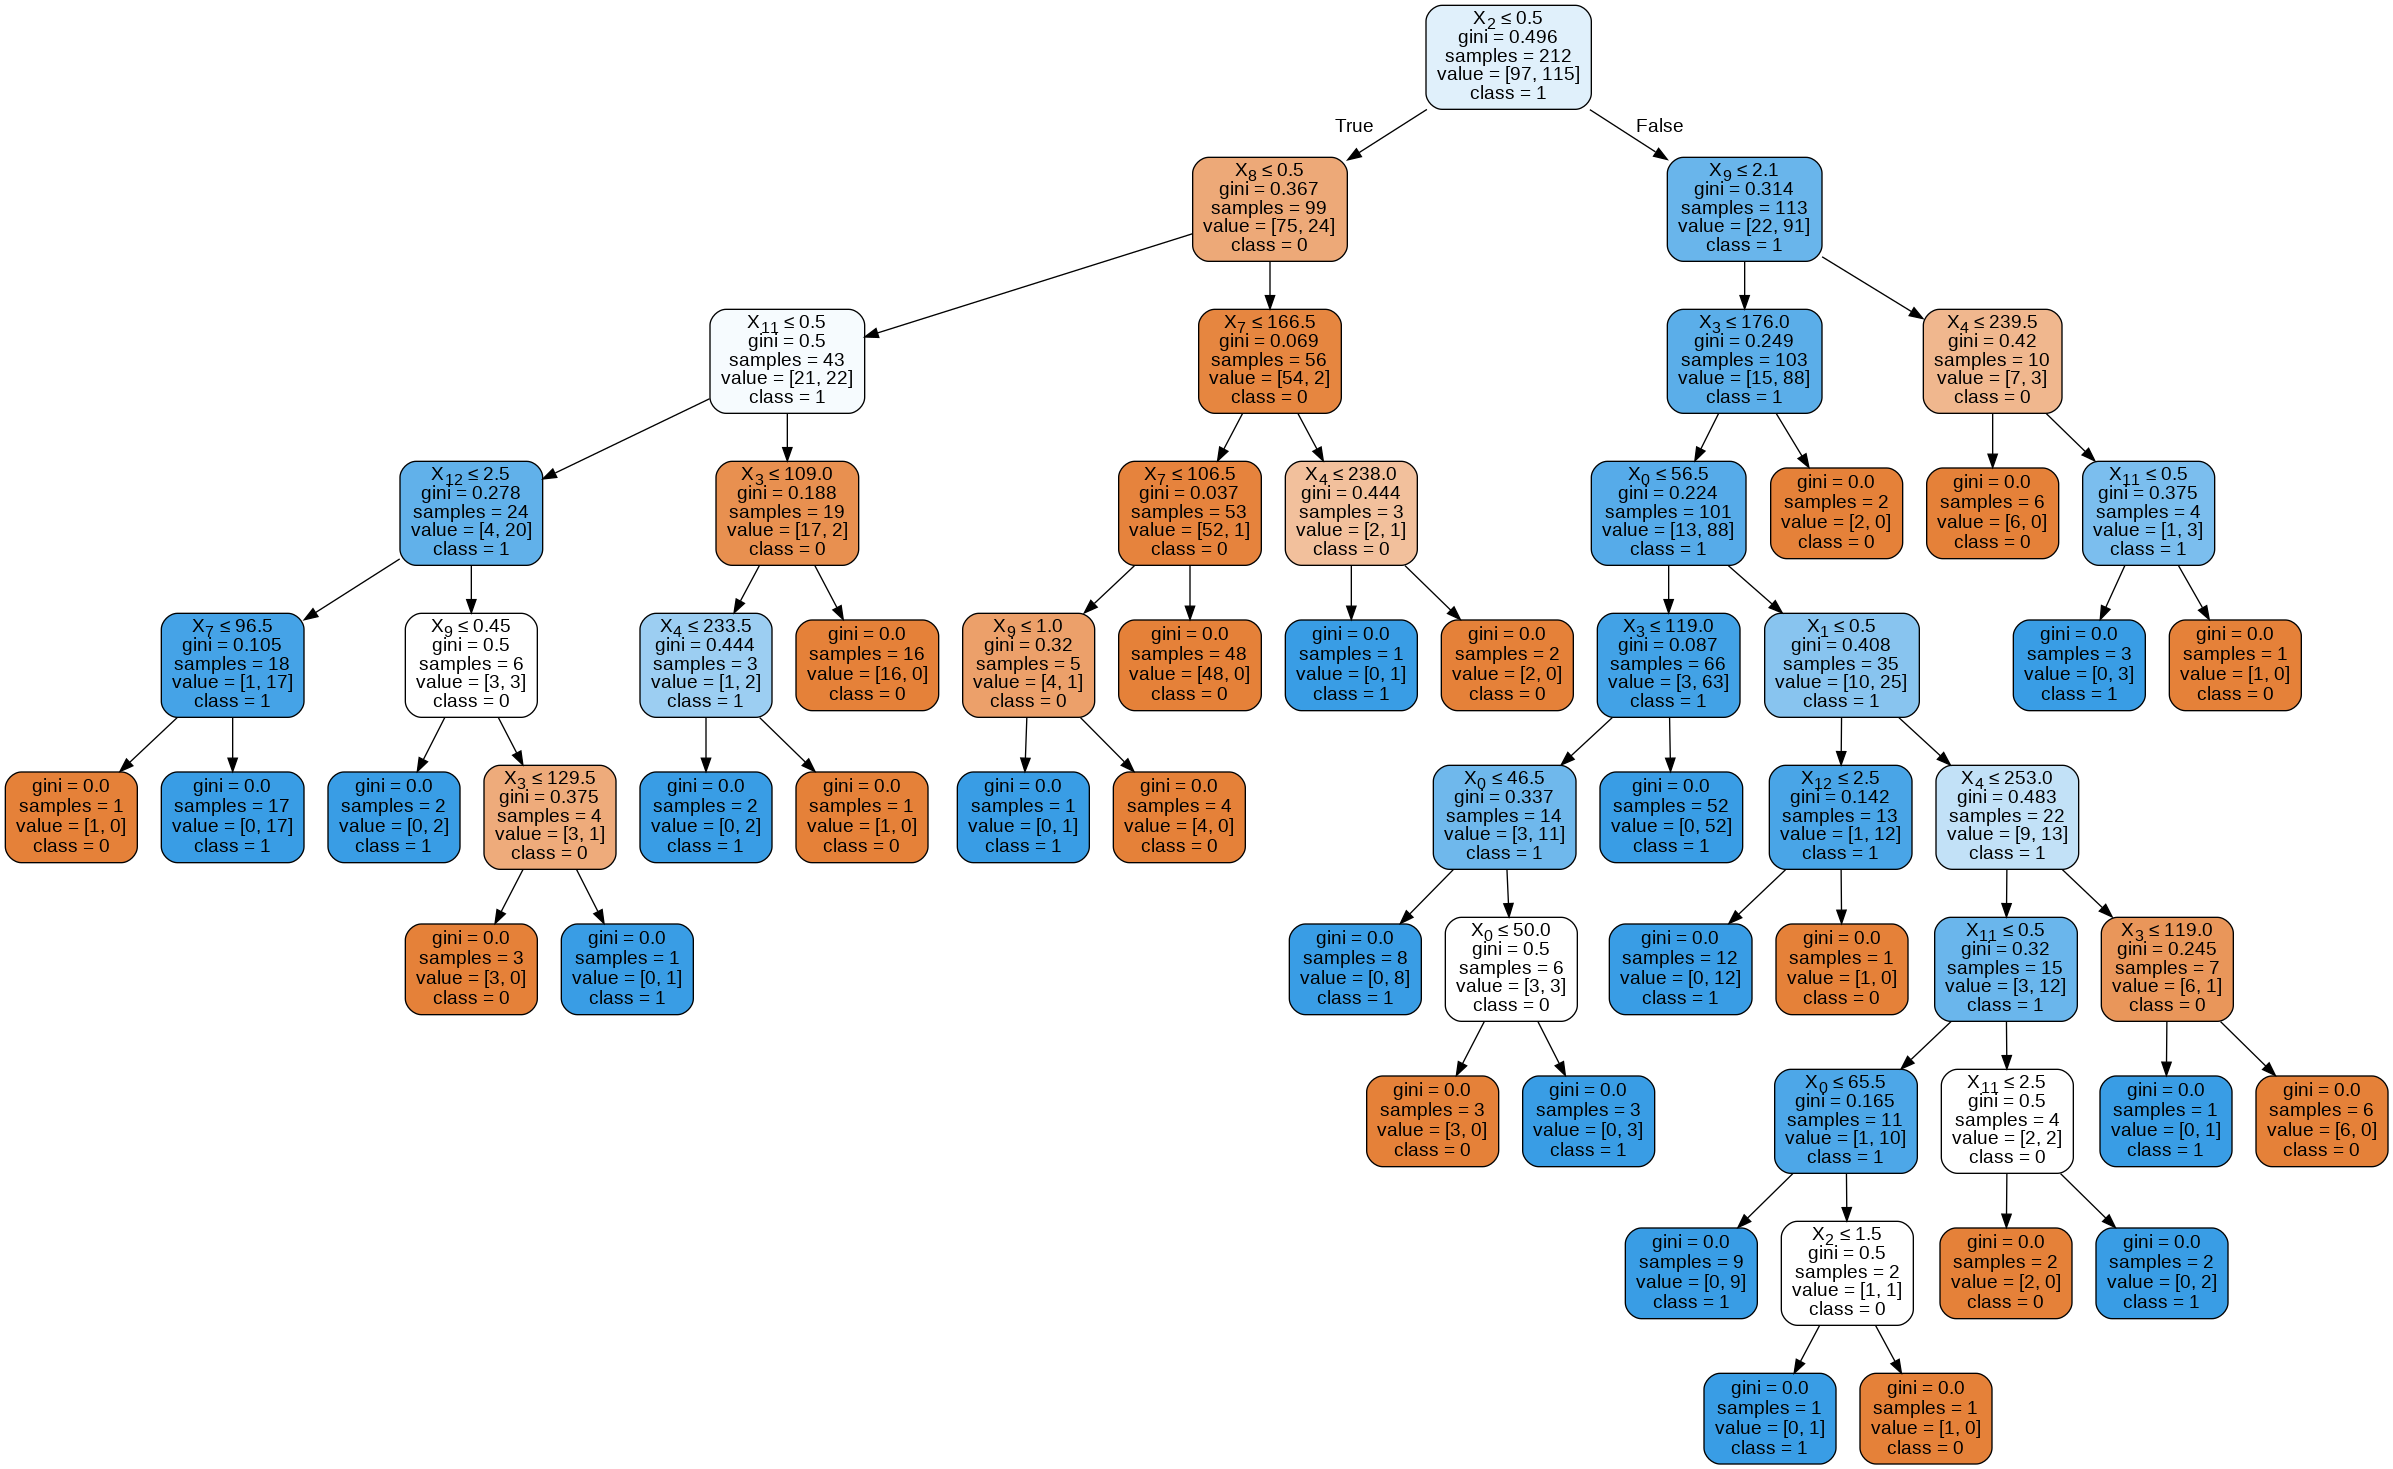

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Data Processing <a name="4"></a>

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [12]:
df.head(3)

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1

[3 rows x 14 columns]

In [13]:
#One Hot Encoding
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

Splitting the dataset into training and test set

In [43]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

standardScaler = StandardScaler()
#columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


X_train_scaled = standardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = standardScaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
X_train.head()

# k-Nearest Neighor Algorithm <a name="5"></a>

Implementing GridSearchCv to select best parameters and applying k-NN Algorithm

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }
model = GridSearchCV(knn,params,cv=10, n_jobs=-1)
model.fit(X_train,y_train)
model.best_params_  

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

Making prediction

In [63]:
predict = model.predict(X_test)
predict

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1])

** Model evaluation**

Checking accuracy

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def print_confusion_matrix(y_test,y_predict):
  cnf_matrix = confusion_matrix(y_test,y_predict)
  print('Accuracy Score: ',round(accuracy_score(y_test,y_predict),5)*100,'%')

  ## COnfusion matrix
  class_names = [0,1]
  fig,ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks,class_names)
  plt.yticks(tick_marks,class_names)

  #create a heat map
  sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
  ax.xaxis.set_label_position('top')
  plt.tight_layout()
  plt.title('Confusion matrix for the Model', y = 1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  ## Classification report
  print('Classification report: \n',classification_report(y_test,y_predict))
 

In [ ]:
print_confusion_matrix(y_test,predict)

Receiver Operating Characterstic(ROC) Curve

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve

def print_ROC(y_test,y_pred):

  #Create true and false positive rates
  fp_rate,tp_rate,threshold = roc_curve(y_test,y_pred)

  #Plot ROC Curve
  plt.figure(figsize=(10,6))
  plt.title('Revceiver Operating Characterstic')
  plt.plot(fp_rate,tp_rate)
  plt.plot([0,1],ls='--')
  plt.plot([0,0],[1,0],c='.5')
  plt.plot([1,1],c='.5')
  plt.xlabel('False positive rate (1-Specificity)')
  plt.ylabel('True positive rate (Sensitivity)')
  plt.grid(True)

  #Calculate area under the curve
  print("area under the curve score:",roc_auc_score(y_test,y_pred))


In [ ]:
print_ROC(y_test,y_pred)

# Logistic Regression <a name="6"></a>

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logre = LogisticRegression()
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(logre,param_grid=params,cv=10,scoring='roc_auc')

log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
print('Logistic Regression parameters: ',log_model.best_params_)


Logistic Regression parameters:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}


In [67]:
y_pred = log_model.predict(X_test)

In [68]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }
result  = pd.DataFrame(dic)

In [69]:
import plotly.graph_objects as go
 
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

**Model Evaluation**

Accuracy Score:  78.022 %
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



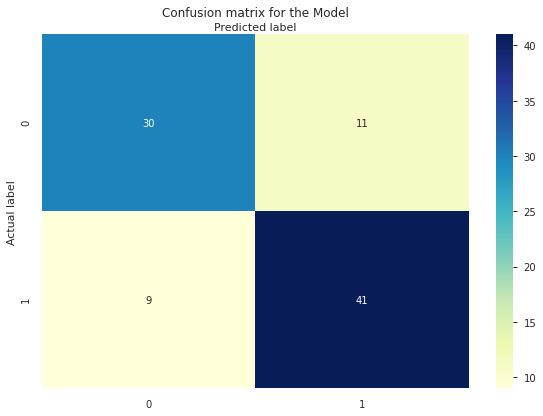

In [70]:
print_confusion_matrix(y_test,y_pred)

area under the curve score: 0.7958536585365853


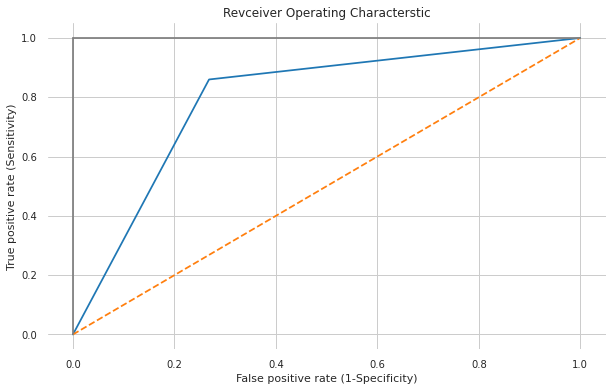

In [54]:
print_ROC(y_test,y_pred)

# Random Forest Classifier <a name="7"></a>

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [20]:
score.mean()

0.8148387096774193

# Conclusion <a name="7"></a>

## 1.Coefficients

In [55]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[0.03148861]


Coeffecient
cp           1.072683
restecg      0.657875
slope        0.202846
fbs          0.075164
thalach      0.036613
chol        -0.004088
age         -0.005793
trestbps    -0.018695
thal        -0.322234
ca          -0.586463
oldpeak     -0.799485
exang       -0.895801
sex         -1.620736

<Figure size 720x864 with 0 Axes>

## 2.Analysis

In [57]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')